In [4]:
from data.startform import StartForm
import osmnx as ox
import networkx as nx

from geopy.geocoders import Nominatim
import geopandas as gpd

In [27]:
def findplace(address):
    locator = Nominatim(user_agent = "i2d")
    location = locator.geocode(address)
    tags = {'amenity': ['restaurant', 'pub', 'cafe'],
        'building': 'hotel',
        'tourism': 'hotel'}
    if location:
        gdf = ox.features.features_from_point((location.latitude, location.longitude), dist=500, tags=tags)
        # print(gdf['geometry'])
        gdf.plot(figsize=(14,10), color='black')
        # gdf['coordinates'] = gdf[['lon', 'lat']].values.tolist()
        # gdf['coordinates'] = gdf['coordinates'].apply(Point)
        gdf = gpd.GeoDataFrame(gdf, geometry='geometry')
        fig, ax = ox.plot_graph(ox.plot_graph(ox.graph_from_place(address)))

        print(ax)
        return {"lat": location.latitude, "lon": location.longitude, "address": address}
    else:
        return {"address": address, "lat": None, "lon": None}


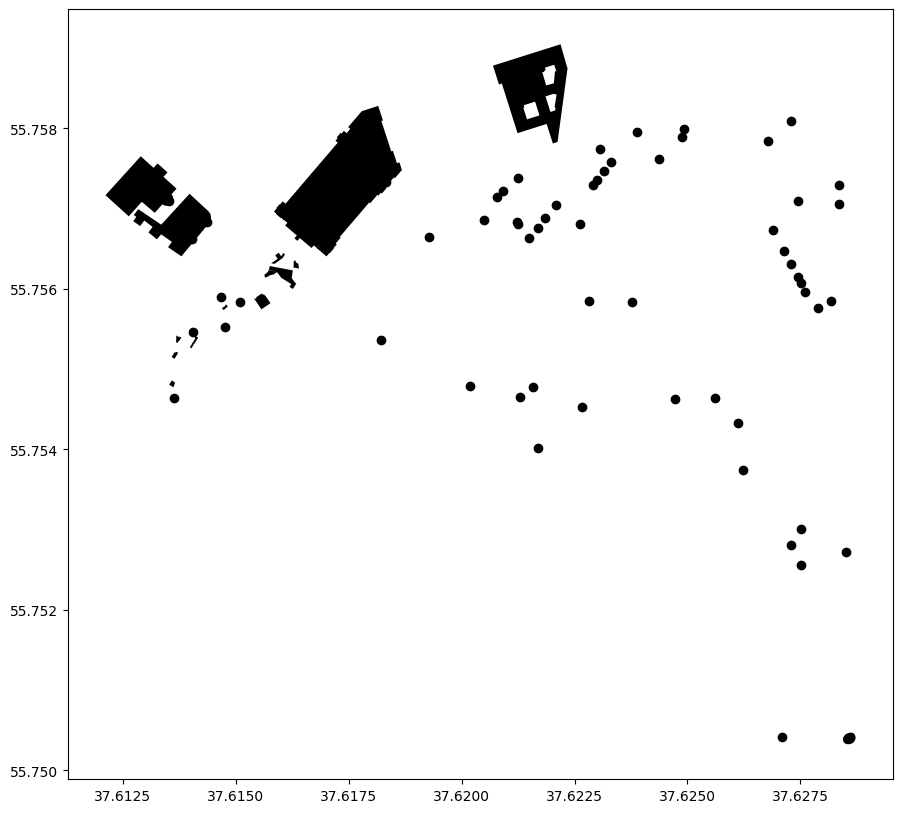

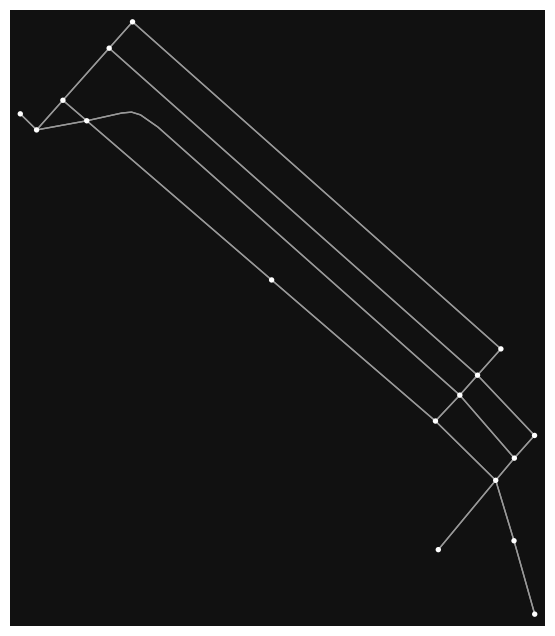

AttributeError: 'tuple' object has no attribute 'graph'

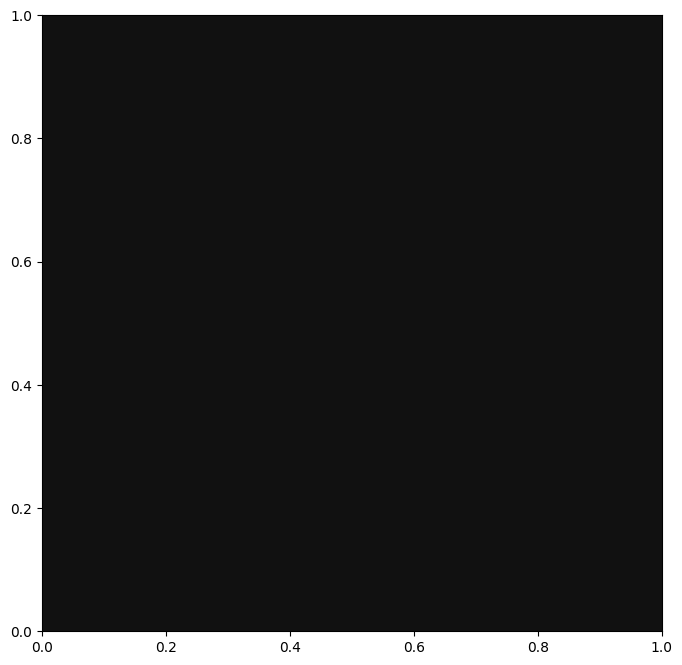

In [29]:
findplace("Москва, красная площадь")

C:\Users\Daria\AppData\Local\Programs\Python\Python312\Lib\site-packages\osmnx\graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(
C:\Users\Daria\AppData\Local\Temp\ipykernel_13636\3669832827.py:29: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  nearby_places = ox.geometries_from_point((latitude, longitude), dist=distance, tags=tags)


ValueError: x attribute access only provided for Point geometries

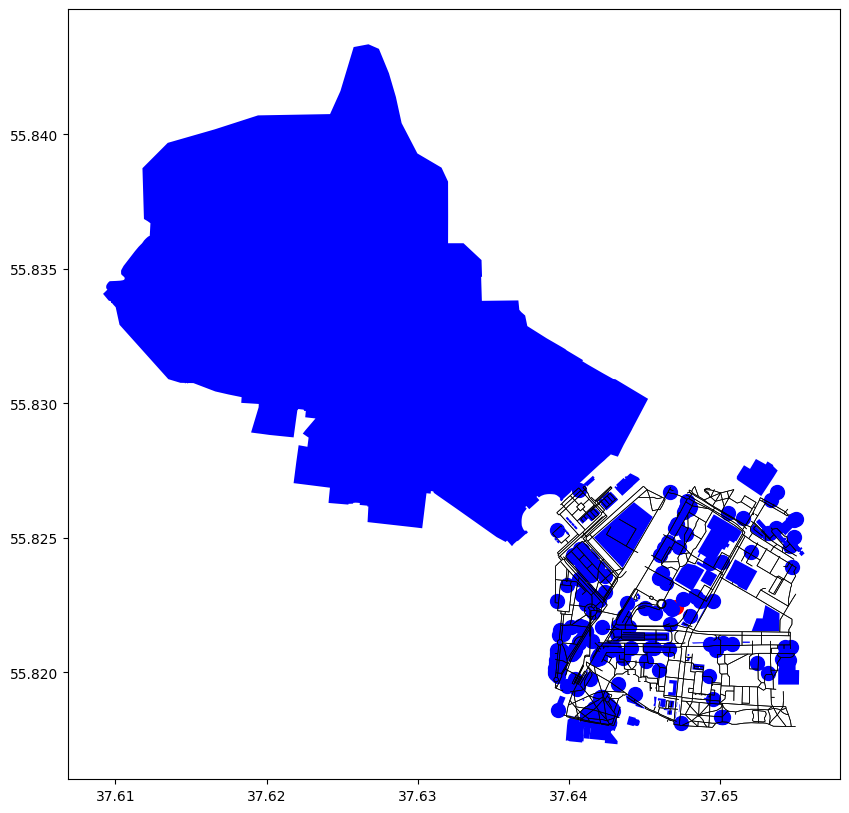

In [33]:
import osmnx as ox
import geopandas as gpd
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

def plot_nearby_places(address, distance=500):
    # Инициализируем геоколлектор
    geolocator = Nominatim(user_agent="geoapiExercises")

    # Получаем координаты по адресу
    location = geolocator.geocode(address)
    if location is None:
        print("Не удалось найти адрес.")
        return

    # Получаем координаты
    latitude = location.latitude
    longitude = location.longitude

    # Загружаем улицы в округе
    graph = ox.graph_from_point((latitude, longitude), dist=distance, network_type='walk')
    nodes, edges = ox.graph_to_gdfs(graph)

    # Создаем точку на карте
    point = gpd.GeoDataFrame(geometry=gpd.points_from_xy([longitude], [latitude]), crs="EPSG:4326")

    # Находим заведения поблизости
    tags = {'amenity': True}
    nearby_places = ox.geometries_from_point((latitude, longitude), dist=distance, tags=tags)

    # Строим карту
    fig, ax = plt.subplots(figsize=(10, 10))
    edges.plot(ax=ax, linewidth=0.5, color='black')
    point.plot(ax=ax, color='red', markersize=100, label='Адрес')

    if not nearby_places.empty:
        nearby_places.plot(ax=ax, color='blue', markersize=100, label='Заведения')
        for x, y, label in zip(nearby_places.geometry.x, nearby_places.geometry.y, nearby_places['name']):
            ax.text(x, y, label, fontsize=8, ha='right')

    ax.set_title(f'Заведения в радиусе {distance} метров от {address}')
    ax.set_xlabel('Долгота')
    ax.set_ylabel('Широта')
    ax.legend()
    plt.show()

# Пример использования
plot_nearby_places("просп. Мира, 150, Москва, Россия")


C:\Users\Daria\AppData\Local\Programs\Python\Python312\Lib\site-packages\osmnx\graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(
C:\Users\Daria\AppData\Local\Temp\ipykernel_13636\484597319.py:23: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  facilities = ox.geometries_from_point((lat, lon), dist=radius, tags=tags)


ValueError: x attribute access only provided for Point geometries

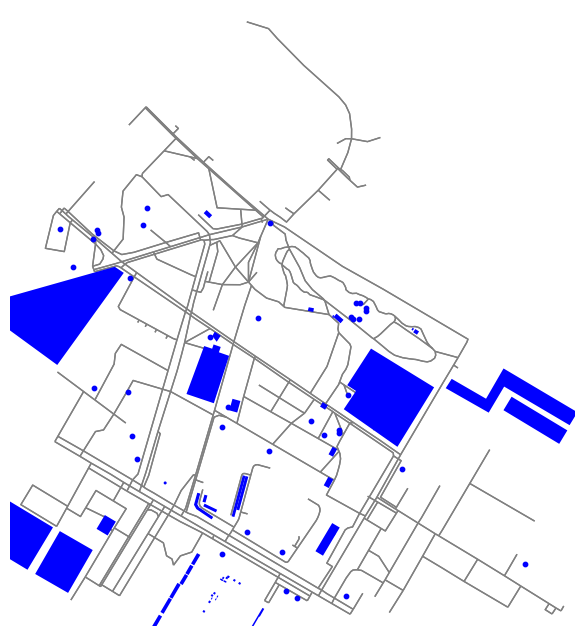

In [34]:
import osmnx as ox
import geopandas as gpd
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

def plot_nearby_places(address, radius=500):
    # Инициализация геолокатора
    geolocator = Nominatim(user_agent="geoapiExercises")
    
    # Получение координат по адресу
    location = geolocator.geocode(address)
    if location is None:
        print("Адрес не найден.")
        return
    
    lat, lon = location.latitude, location.longitude
    
    # Получение графа улиц в радиусе
    G = ox.graph_from_point((lat, lon), dist=radius, network_type='walk')
    
    # Получение зданий и заведений в радиусе
    tags = {'amenity': True}
    facilities = ox.geometries_from_point((lat, lon), dist=radius, tags=tags)
    
    # Создание карты
    fig, ax = ox.plot_graph(G, node_size=0, edge_color='gray', bgcolor='white', show=False, close=False)
    
    # Отображение заведений на карте
    if not facilities.empty:
        facilities['geometry'].plot(ax=ax, color='blue', markersize=10, label='Заведения')
        
        # Подписываем названия заведений
        for x, y, label in zip(facilities.geometry.x, facilities.geometry.y, facilities['name']):
            ax.text(x, y, label, fontsize=8, ha='right')
    
    # Настройка отображения карты
    plt.title(f'Заведения поблизости от: {address}')
    plt.legend()
    plt.show()

# Пример использования
plot_nearby_places("Кремль, Москва")


In [42]:
import osmnx as ox
import geopandas as gpd
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

def plot_nearby_places(address, radius=500):
    # Инициализация геолокатора
    geolocator = Nominatim(user_agent="geoapiExercises")
    
    # Получение координат по адресу
    location = geolocator.geocode(address)
    if not location:
        print("Адрес не найден.")
        return
    
    latitude, longitude = location.latitude, location.longitude
    
    # Получение графа улиц вокруг координат
    G = ox.graph_from_point((latitude, longitude), dist=radius, network_type='walk')
    
    # Получение точек интереса (POI) в радиусе
    tags = {'amenity': True}  # Можно изменить на другие теги, если нужно
    pois = ox.geometries_from_point((latitude, longitude), dist=radius, tags=tags)
    
    # Создание карты
    fig, ax = ox.plot_graph(G, node_size=0, edge_color='gray', show=False, close=False)
    
    # Отображение POI на карте
    if not pois.empty:
        pois.plot(ax=ax, color='red', markersize=5)
        # print(pois['geometry'])
        for i, r in pois.iterrows():
            if type(r['geometry']) != 'Polygon':
                x = r['geometry'].x
                y = r['geometry'].y
            
                ax.text(x, y, 'l', fontsize=8, ha='right')
    
    # Настройка отображения карты
    ax.set_title(f'Заведения поблизости от: {address}', fontsize=15)
    plt.xlim(longitude - 0.01, longitude + 0.01)
    plt.ylim(latitude - 0.01, latitude + 0.01)
    
    plt.show()

# Пример использования функции
plot_nearby_places("Красная площадь, Москва")


GeocoderInsufficientPrivileges: Non-successful status code 403